<a href="https://colab.research.google.com/github/Damntoochill/Learning-ML/blob/master/Shampoo_sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [0]:
from google.colab import files
files.upload()

  Month  Sales of shampoo over a three year period
0  1-01                                      266.0
1  1-02                                      145.9
2  1-03                                      183.1
3  1-04                                      119.3
4  1-05                                      180.3


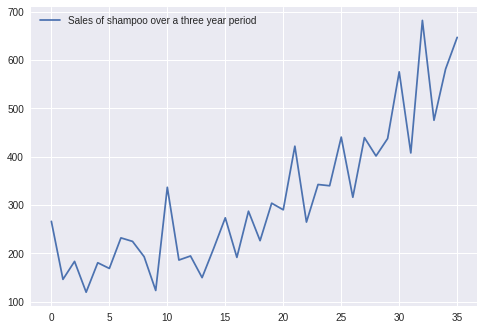

In [5]:
#create a datafrme
dataset = pd.read_csv('shampoo.csv')
print(dataset.head())
dataset.plot()
plt.show()

Clearly the data is not stationary. It has a trend.

In [0]:
dataset.columns = ['Month','Sales']

In [13]:
dataset['Month'].dtype

dtype('O')

In [0]:
dataset

In [0]:
dataset.drop(dataset.tail(1).index, inplace = True)

In [0]:
dataset['Month'] = dataset['Month'].apply(lambda x: datetime.strptime('190'+x, '%Y-%m'))

In [19]:
dataset.head()

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [0]:
dataset.set_index('Month')

In [0]:
#defining Augmented Dickey Fuller Test
def adf_test(time_series):
  print('Results of ADF :')
  dftest = adfuller(time_series, autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics','p-Value','No of Lags Used', 'No of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Values (%s)' %key] = value
  print(dfoutput)

In [23]:
adf_test(dataset['Sales'])

Results of ADF :
Test Statistics             3.060142
p-Value                     1.000000
No of Lags Used            10.000000
No of Observations Used    25.000000
Critical Values (1%)       -3.723863
Critical Values (5%)       -2.986489
Critical Values (10%)      -2.632800
dtype: float64


The results clearly shows that the data is not stationary

In [0]:
#defining KPSS test
def kpss_test(time_series):
  print('Results of KPSS test : ')
  kptest = kpss(time_series, regression = 'c')
  kpoutput = pd.Series(kptest[0:3], index = ['Test Statistics', 'p Value', 'No of Lags Used'])
  for key,value in kptest[3].items():
    kpoutput['Critical Value at (%s)' %key] = value
  print(kpoutput)

In [26]:
kpss_test(dataset['Sales'])

Results of KPSS test : 
Test Statistics              0.439388
p Value                      0.060178
No of Lags Used             10.000000
Critical Value at (10%)      0.347000
Critical Value at (5%)       0.463000
Critical Value at (2.5%)     0.574000
Critical Value at (1%)       0.739000
dtype: float64


P value is lesser than the critical values. So the data is not stationary


In [27]:
#lets make the data stationary by taking log
dataset['log_sales'] = dataset['Sales'].apply(lambda x: np.log(x))
dataset.head()

,Month,Sales,log_sales
0,1901-01-01,266.0,5.583496
1,1901-02-01,145.9,4.982921
2,1901-03-01,183.1,5.210032
3,1901-04-01,119.3,4.781641
4,1901-05-01,180.3,5.194622


In [28]:
adf_test(dataset['log_sales'])

Results of ADF :
Test Statistics             1.798463
p-Value                     0.998346
No of Lags Used            10.000000
No of Observations Used    25.000000
Critical Values (1%)       -3.723863
Critical Values (5%)       -2.986489
Critical Values (10%)      -2.632800
dtype: float64


In [29]:
kpss_test(dataset['log_sales'])

Results of KPSS test : 
Test Statistics              0.441996
p Value                      0.059053
No of Lags Used             10.000000
Critical Value at (10%)      0.347000
Critical Value at (5%)       0.463000
Critical Value at (2.5%)     0.574000
Critical Value at (1%)       0.739000
dtype: float64


The data is still not stationary

Let's continue without making the data stationary :(

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


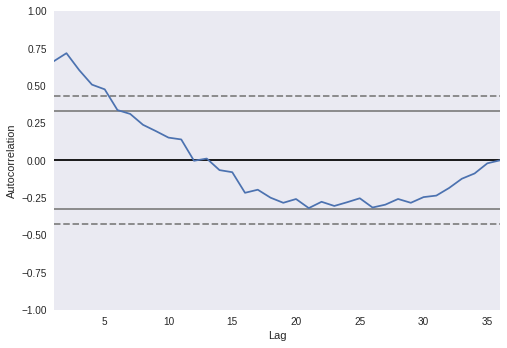

In [32]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(dataset['Sales'])
plt.show()

In [0]:
dataset.drop('log_sales', axis = 1, inplace = True)

In [0]:
data = pd.Series(dataset['Sales'], index=dataset.Month)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sat, 16 Feb 2019   AIC                            406.340
Time:                        23:46:52   BIC                            417.227
Sample:                    01-02-2019   HQIC                           410.098
                         - 03-12-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


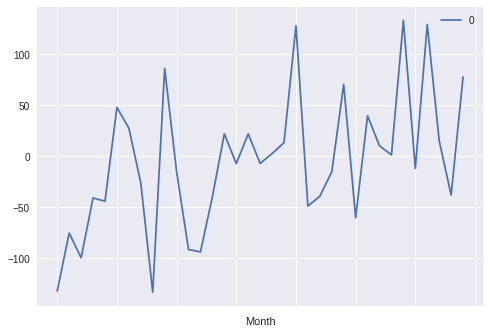

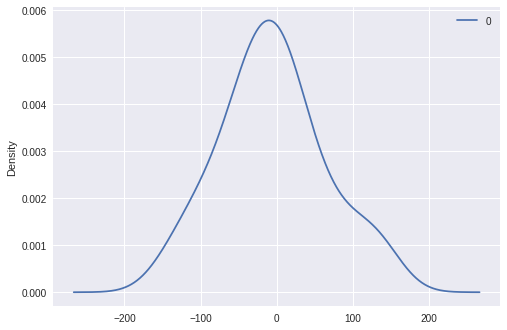

                0
count   35.000000
mean    -5.495314
std     68.132875
min   -133.296699
25%    -42.477969
50%     -7.186746
75%     24.748228
max    133.237885


In [79]:
#creating an ARIMA model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

#plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())